# Bibliotecas

In [51]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Analise Exploratoria do DataSet

In [52]:
dados_gerais = pd.read_csv("Dados_totais.csv")
dados_genero = pd.read_csv("data_by_genres.csv")
dados_anos = pd.read_csv("data_by_year.csv")

In [53]:
dados_gerais.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,0,3AJwUDP919kvQ9QcozQPxg,0.000121,11,0.2340,-7.227,1,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,1,0I3q5fE6wg7LIfHGngUTnV,0.000000,4,0.0771,-5.946,0,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,0,60a0Rd6pjrkxjPbaKzXjfq,0.000000,3,0.2090,-5.870,0,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,0,6ZOBP3NvffbU4SZcrnt1k6,0.000011,11,0.1680,-5.708,0,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,1,3yfqSUWxFvZELEM4PmlwIR,0.000000,5,0.0454,-4.244,0,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [54]:
dados_gerais = dados_gerais.drop(["explicit", "mode", "key"], axis =1) #exclui algumas colunas que eu não vou usar e vou fazer isso em todas as bases
dados_gerais.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [55]:
dados_genero = dados_genero.drop(["mode", "key"], axis =1) 
dados_genero.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


In [56]:
#identifico que os anos no dataset (dados_anos) começa em 1921 e no dataset (dados_gerais) em 2000. Para realiza serie temporais ou analises mais profunda 
# irei selecionar apenas os dados que começam apartir de 2000 no dataset (dados_anos)

dados_anos.head() 

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [57]:
dados_anos["year"].unique() #confirmo todas as datas que tem no dataset dados_anos

array([1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931,
       1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942,
       1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953,
       1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964,
       1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

In [58]:
dados_anos=dados_anos[dados_anos ['year']>= 2000] #selecionei e salvei os dados apartir de 2000 em diante
dados_anos["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [59]:
dados_anos = dados_anos.drop(["mode", "key"], axis =1)  #agora com os dados alinhados com as datas correspondendte nas duas bases, vou dropar as colunas mode e key
dados_anos.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
79,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049
80,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125
81,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500
82,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407
83,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143


In [60]:
dados_anos.reset_index() # resetei o index para manter o padrao 

,index,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,79,2000,0.289323,0.590918,242724.642638,0.625413,0.101168,0.197686,-8.247766,0.089205,118.999323,0.559475,46.684049
1,80,2001,0.286842,0.583318,240307.796010,0.626986,0.107214,0.187026,-8.305095,0.089182,117.765399,0.541479,48.750125
2,81,2002,0.282624,0.576160,239503.283000,0.641270,0.088048,0.193911,-7.686640,0.084308,119.239738,0.542397,48.655500
3,82,2003,0.256471,0.575763,244670.575230,0.660165,0.083049,0.196976,-7.485545,0.093926,120.914622,0.530504,48.626407
4,83,2004,0.280559,0.567680,237378.708037,0.648868,0.077934,0.202199,-7.601655,0.094239,121.290346,0.524489,49.273143
5,84,2005,0.255764,0.572281,237229.588205,0.653209,0.090194,0.190082,-7.466159,0.093334,121.617967,0.532531,50.953333
6,85,2006,0.279986,0.568230,234042.914359,0.650326,0.077701,0.188289,-7.265501,0.085847,121.798615,0.520028,51.313846
7,86,2007,0.254081,0.563414,241049.962564,0.668305,0.072957,0.196127,-7.044536,0.084347,124.087516,0.516794,51.075897
8,87,2008,0.249192,0.579193,240107.315601,0.671461,0.063662,0.198431,-6.843804,0.077356,123.509934,0.527542,50.630179
9,88,2009,0.261929,0.564190,238140.013265,0.670749,0.075872,0.205252,-7.046015,0.085458,123.463808,0.507170,51.440816


In [61]:
figura_correlacao = px.imshow(dados_gerais.corr(), text_auto = True) # Fiz uma matriz de correlação sobre as informações do dataset para entender quais dados podem se correlacionar 
figura_correlacao.show()

# Preparacao dos dados aplicando (StandardScaler e o PCA)

In [62]:
dados_genero 

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071
...,...,...,...,...,...,...,...,...,...,...,...,...
2968,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943
2969,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000
2970,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667
2971,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000


In [63]:
# Vou iniciar a preparação dos dados com a base de genero, nesse tratamento eu estou excluindo a coluna genero e incluindo as informações em outra variavel

dados_genero1= dados_genero.drop('genres', axis= 1) 
dados_genero1

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071
...,...,...,...,...,...,...,...,...,...,...,...
2968,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943
2969,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000
2970,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667
2971,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000


# Aplicando a Clusterização na base dados_genero

#### Nessa etapa vou iniciar o metodo de pipeline de machine learning do sklearn, o foco de um pipeline de machine learning é dividir uma tarefa completa de machine learning em um fluxo de trabalho de várias etapas.Cada etapa é um componente gerenciável que pode ser desenvolvido, otimizado, configurado e automatizado individualmente.

#### Em seguida irei usar o StandardScaler, esse metodo calcular a média e o desvio padrão em um conjunto de treinamento, de modo a poder reaplicar posteriormente a mesma transformação no conjunto de teste, tornando eles mais padronizados entre si

#### E para finalizar o PCA, é uma técnica para reduzir a dimensão de um conjunto de dados preservando, de certa forma, suas propriedades

In [64]:
# construi minha pipeline denominada de  pca,abro uma lista com os modulos que eu quero utiliza(PCA E StandardScaler) em seguida chamo o PCA para e defino o número de linhas que eu desejo 
# a redução (se no meu dataset genero eu tenho 11 colunas, com PCA ele reduzi para os parametros que eu pedir, aqui será 2) em seguida defino e passo o SEED para o cod se torna escalavél

SEED = 1224

np.random.seed(1224)


pca= Pipeline ([('scaler', StandardScaler()), ('PCA', PCA (n_components =2, random_state = SEED))])

In [65]:
# abro uma variavél genero, passo para ela o (pca.fit_transform) pca vai realiza a redução de linhas que eu pedi e fit_transforman ajusta e transforma os dados. 
# após essa redução com PCA eu incluo as informações inputadas para um novo dataframe chamado projeto, definindo as colunas com x e y para manter o padrã

genero = pca.fit_transform(dados_genero1)
projeto = pd.DataFrame(columns = ['x', 'y'], data= genero)

In [66]:
# confirmo que o dataframe está correto

projeto

,x,y
0,5.910268,-0.011146
1,2.787093,4.498483
2,-0.757538,-1.258495
3,1.020521,-0.931690
4,0.753911,-0.999861
...,...,...
2968,-0.475136,-0.017126
2969,-3.026756,-1.304983
2970,-0.832511,-1.089726
2971,1.774790,-3.695233


# Executando a Clusterização por genero com K-Means (Dataset Genero)

### K-Means é um algoritmo de aprendizado não supervisionado (ou seja, que não precisa de inputs de confirmação externos) que avalia e clusteriza os dados de acordo com suas características

### O KMeans é um método da biblioteca scikit-learno qual permite a formação de clusters através do cálculo das K-Médias. Nele posso passar variáveis de entrada para a predição do modelo através do método predict

In [67]:
# abro uma variavél para fazer o treinamento (kmeans_pca) em seguida eu  defino um ‘K’centroides, ou seja, um número de clusters (ou agrupamentos) aqui será 5, defino também a verbose como verdadeiro 
# verbose é uma maneira de ver a execução do cod em treinamento, em seguida o fit(projeto) que é o dataframe que eu defini acima, depois da transformações do PCA e SEED para manter escalavél

kmeans_pca = KMeans(n_clusters= 5, verbose= True, random_state = SEED)

kmeans_pca.fit(projeto)

dados_genero['cluster_pca'] = kmeans_pca.predict(projeto)
projeto['cluster_pca'] = kmeans_pca.predict(projeto)

Initialization complete
Iteration 0, inertia 4523.567815543693
Iteration 1, inertia 3668.985552156024
Iteration 2, inertia 3624.7309257118195
Iteration 3, inertia 3602.495813758819
Iteration 4, inertia 3588.060791240484
Iteration 5, inertia 3575.439570259302
Iteration 6, inertia 3566.376131163019
Iteration 7, inertia 3562.5917284574925
Iteration 8, inertia 3560.314467700935
Iteration 9, inertia 3558.885495152648
Iteration 10, inertia 3558.002748934052
Iteration 11, inertia 3557.729554775488
Converged at iteration 11: center shift 9.319981044865446e-05 within tolerance 0.00027098868470996494.
Initialization complete
Iteration 0, inertia 3650.5166847646506
Iteration 1, inertia 3552.891536564817
Iteration 2, inertia 3528.9425421232254
Iteration 3, inertia 3518.849132048711
Iteration 4, inertia 3512.6717916139787
Iteration 5, inertia 3509.174107824746
Iteration 6, inertia 3506.388333551375
Iteration 7, inertia 3505.0910743094114
Iteration 8, inertia 3504.6465117384932
Converged at iteratio

In [68]:
# aqui o algoritimo gera uma matriz de distância entre cada ponto e os centroides, a distância entre cada ponto e os centroides é calculada.

projeto

,x,y,cluster_pca
0,5.910268,-0.011146,3
1,2.787093,4.498483,3
2,-0.757538,-1.258495,4
3,1.020521,-0.931690,1
4,0.753911,-0.999861,1
...,...,...,...
2968,-0.475136,-0.017126,2
2969,-3.026756,-1.304983,4
2970,-0.832511,-1.089726,4
2971,1.774790,-3.695233,1


In [69]:
# inclui a coluna genero no projeto para facilitar na consulta 

projeto['generos']= dados_genero['genres']

projeto

,x,y,cluster_pca,generos
0,5.910268,-0.011146,3,21st century classical
1,2.787093,4.498483,3,432hz
2,-0.757538,-1.258495,4,8-bit
3,1.020521,-0.931690,1,[]
4,0.753911,-0.999861,1,a cappella
...,...,...,...,...
2968,-0.475136,-0.017126,2,zolo
2969,-3.026756,-1.304983,4,zouglou
2970,-0.832511,-1.089726,4,zouk
2971,1.774790,-3.695233,1,zurich indie


# Plotando Clustering por Genero

In [70]:
# Aqui eu ploto um grafico para avaliar as classes e distancias de cada centroide, funciona assim: o centroide que está mais perto do ponto vai ‘incorporá-lo’, ou seja, o ponto vai pertencer à classe representada pelo centroide que está mais perto do ponto
# definir x aqui com mesmo x que tenho no projeto e y a mesma coisa, e hover_data para o grafico lista os generos escritos

grafico = px.scatter(
    projeto, x='x', y='y', color='cluster_pca', hover_data=['x', 'y','generos'])
grafico.show()

## Como validar o modelo da clusterização por genero

-Uma forma de avaliar se a cluster foi bem separada ou não, é utilizar um (Explained Variance do PCA)

-Explained Variance do português Variância explicada é usada para medir a discrepância entre um modelo e os dados reais, em resumo o qual explicado e treinado está meu modelo de machine learning.

In [71]:
#trouxe a 1 posição do centroide e somando o resultado fica em quase 50% explicado, o que não é ruim, mas pode ser melhorado

pca[1].explained_variance_ratio_.sum()

0.4927066994726641

# Executando a Clusterização por musica com K-Means (Dataset Musica)

### Redução de dimensionalidade com PCA

In [72]:
# Para essa clusterização por musica vou usar a base dados_gerais

dados_gerais.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,name,popularity,speechiness,tempo,artists_song
0,0.285,2000,0.00239,Coldplay,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,Yellow,84,0.0281,173.372,Coldplay - Yellow
1,0.613,2000,0.14300,OutKast,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,Ms. Jackson,80,0.2690,94.948,OutKast - Ms. Jackson
2,0.400,2000,0.00958,Linkin Park,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,In the End,84,0.0584,105.143,Linkin Park - In the End
3,0.543,2000,0.00664,3 Doors Down,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,Kryptonite,78,0.0286,99.009,3 Doors Down - Kryptonite
4,0.760,2000,0.03020,Eminem,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,The Real Slim Shady,80,0.0572,104.504,Eminem - The Real Slim Shady


In [73]:
#Para usar essa coluna eu vou precisar codificar essa variáveis categórias para números onde o modelo de machine learning consiga entender e processar

dados_gerais['artists'].value_counts()

Drake                   170
Taylor Swift            156
Eminem                  147
Kanye West              136
BTS                     122
                       ... 
Of Monsters and Men       7
The Living Tombstone      7
Clean Bandit              7
Nelly Furtado             6
Empire of the Sun         6
Name: artists, Length: 875, dtype: int64

### Variaveis categorias são as características que não possuem valores quantitativos, mas, ao contrário, são definidas por várias categorias, ou seja, representam uma classificação.

In [74]:
#  Para fazer essa codificação vou usar o OneHotEncoder
# nessa técnica, para evitar que os modelos interpretem esses atributos como sendo numéricos exemplo (1, 2,3,4,5,6…)sao criadas variáveis binárias, cada uma para um valor possível que o atributo pode assumir


from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder (dtype = int)  #faco carregamento do OneHotEncoder e chamo ele para numeros inteiros
colunas_ohe =ohe.fit_transform(dados_gerais[['artists']]).toarray() # abro uma nova variavel, chamo a transformação para coluna artistas 
dados_gerais_dois = dados_gerais.drop('artists', axis =1) # para não fazer modificacoes no dataset orginal de dados_gerais eu construo uma copia dele e drop a coluna artistas pois quando o OneHotEncoder rodar ele ira trazer varias colunas relacionada a cada artista

dados_musica = pd.concat ([dados_gerais_dois, pd.DataFrame(colunas_ohe, columns = ohe.get_feature_names_out(['artists']))], axis =1) 
dados_musica #nessa etapa eu coloco todas modificacoes dentro da variavel dados_musica, concato as informações acima e uma observação (get_feature_names_out) que vai fazer o dataframe não ficar apenas com colunas 0 e 1 e sim com nome dos artistas incluidos

,valence,year,acousticness,danceability,duration_ms,energy,id,instrumentalness,liveness,loudness,...,artists_Zara Larsson,artists_Zedd,artists_alt-J,artists_blackbear,artists_blink-182,artists_deadmau5,artists_for KING & COUNTRY,artists_fun.,artists_girl in red,artists_iann dior
0,0.285,2000,0.00239,0.429,266773,0.661,3AJwUDP919kvQ9QcozQPxg,0.000121,0.2340,-7.227,...,0,0,0,0,0,0,0,0,0,0
1,0.613,2000,0.14300,0.843,270507,0.806,0I3q5fE6wg7LIfHGngUTnV,0.000000,0.0771,-5.946,...,0,0,0,0,0,0,0,0,0,0
2,0.400,2000,0.00958,0.556,216880,0.864,60a0Rd6pjrkxjPbaKzXjfq,0.000000,0.2090,-5.870,...,0,0,0,0,0,0,0,0,0,0
3,0.543,2000,0.00664,0.545,233933,0.865,6ZOBP3NvffbU4SZcrnt1k6,0.000011,0.1680,-5.708,...,0,0,0,0,0,0,0,0,0,0
4,0.760,2000,0.03020,0.949,284200,0.661,3yfqSUWxFvZELEM4PmlwIR,0.000000,0.0454,-4.244,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,0.187,2020,0.57400,0.445,176250,0.330,0PUkanqCGTb6qseXPKOw1F,0.000000,0.1020,-8.121,...,0,0,0,0,0,0,0,0,0,0
20307,0.240,2020,0.81500,0.467,179188,0.429,6Iw6fQVKZi0fWtEQBrTFcP,0.000052,0.1770,-8.689,...,0,0,0,0,0,0,0,0,0,0
20308,0.466,2020,0.31000,0.562,253613,0.686,308prODCCD0O660tIktbUi,0.022500,0.1250,-8.480,...,0,0,0,0,0,0,0,0,0,0
20309,0.522,2020,0.20400,0.598,230600,0.472,2f8y4CuG57UJEmkG3ujd0D,0.000015,0.1080,-10.991,...,0,0,0,0,0,0,0,0,0,0


In [75]:
## esses são os dados do meu dataset atual
dados_musica.shape

(20311, 890)

In [76]:
## essa proxíma etapa, igual na clusterização por genero vou aplicar o PCA e o StandScaler no dataset dados_musica

pca_pipelene= Pipeline ([('scaler', StandardScaler()), ('PCA', PCA (n_components =0.70, random_state = SEED))]) #diferente da clusterização por genero, aqui eu coloquei a taxa de aprendizagem que é 70% de todos meus dados 

musica_embedding_pca =pca_pipelene.fit_transform(dados_musica.drop(['id', 'name', 'artists_song'], axis = 1)) # aqui aplico a transforma na pipeline e foi necessario o drop de 3 colunas que estão como string no meu dataset que aalgoritimo nao le
projection_m = pd.DataFrame(data =musica_embedding_pca)

## Executando a Clusterização por musica com K-Means (Dataset Musica) - parte 2

In [77]:
# Nessa etapa eu uso o mesmo metodo que usei na clusterizacao por genero mas com algumas diferencas 
# aumentei o numero de clusteris para 50 e verbose coloquei como False para não sujar tanto minha ide

kmeans_pca_pipeline_musica = KMeans(n_clusters= 50, verbose= False, random_state = SEED)

kmeans_pca_pipeline_musica.fit(projection_m)

dados_gerais['cluster_pca'] = kmeans_pca_pipeline_musica.predict(projection_m)
projection_m['cluster_pca'] = kmeans_pca_pipeline_musica.predict(projection_m)

In [78]:
# inclui mais duas colunas no meu dataset projection_m onde tem os dados transformados
projection_m['artist'] = dados_gerais['artists']
projection_m['song'] = dados_gerais['artists_song']

In [79]:
projection_m

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,cluster_pca,artist,song
0,0.174796,0.731252,2.186797,-0.767192,0.594847,0.315968,-0.412322,-0.479171,-2.700668,2.109956,...,-0.009111,0.005154,-0.034027,-0.032617,-2.448503e-12,5.916867e-12,3.121908e-12,41,Coldplay,Coldplay - Yellow
1,-1.358420,0.052935,-1.789973,1.938444,0.403606,1.023898,-1.172118,0.821698,-1.716897,0.252498,...,-0.031986,0.029708,-0.016322,-0.030234,1.249715e-13,-1.457579e-12,-2.040535e-13,41,OutKast,OutKast - Ms. Jackson
2,-0.972077,0.658094,0.757500,-0.277350,-0.400393,0.402941,1.292960,1.839192,-1.562236,1.410677,...,0.017097,0.017361,-0.010979,-0.012781,-1.126295e-12,5.280977e-13,4.085243e-13,41,Linkin Park,Linkin Park - In the End
3,-0.926464,1.292091,0.398499,-0.997738,0.202219,0.620859,-0.527689,1.135529,-1.343893,1.020964,...,0.089337,0.164777,-0.064148,-0.040911,1.258083e-12,4.310193e-12,-4.043356e-13,41,3 Doors Down,3 Doors Down - Kryptonite
4,-1.710077,-0.383502,-1.258562,1.346428,1.223591,1.744579,0.094311,0.479412,-2.125376,0.389565,...,-0.011937,-0.004081,-0.017478,-0.010033,-2.516703e-13,1.619560e-12,3.676579e-13,41,Eminem,Eminem - The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,1.346699,-2.775889,0.986755,-1.704967,0.103935,-0.726582,0.253808,0.520234,-0.064513,0.204971,...,-0.235355,-0.054256,0.016922,-0.125947,-1.236427e-11,1.397844e-11,1.774074e-11,15,Bazzi,Bazzi - I Don't Think I'm Okay
20307,1.269387,-2.444619,0.971408,-0.115303,-0.719597,-1.823579,-0.545186,-1.475719,-0.338390,0.272129,...,-0.183026,0.074605,0.005622,0.000054,-1.258064e-11,2.210559e-11,-6.425509e-12,15,Bryson Tiller,Bryson Tiller - Timeless Interlude
20308,0.781916,-1.164865,0.705256,-0.947160,1.145828,-0.472667,-0.356604,0.972512,0.900317,-0.674016,...,-0.033420,-0.157564,0.213849,-0.065180,2.362917e-11,-9.586614e-12,9.207036e-12,15,Fleet Foxes,Fleet Foxes - Sunblind
20309,0.002454,-3.056407,-0.272934,1.436355,-0.604453,0.251492,-1.361710,-0.633245,0.280076,0.521145,...,-0.784640,0.080684,0.038379,0.108493,-2.187180e-12,5.916833e-11,-8.516342e-12,15,Gunna,Gunna - NASTY GIRL / ON CAMERA


# Plotando Clustering por Musica 

In [80]:
#Fiz o mesmo grafico aqui para musica, passando como parametro as colunas 0 e 1 do meu projection_m, pois as primeiras colunas do PCA são melhores explicativas
# Aqui é apenas uma maneira visual de olhar a clusterizacao mas não é a melhor maneira de validacao

grafico2 = px.scatter(
    projection_m, x=0, y=1, color='cluster_pca', hover_data=[0, 1,'song'])
grafico2 .show()

## Como validar o modelo da clusterização por musica

-Uma forma de avaliar se a cluster foi bem separada ou não, é utilizar um (Explained Variance do PCA)

-Explained Variance do português Variância explicada é usada para medir a discrepância entre um modelo e os dados reais, em resumo o qual explicado e treinado está meu modelo de machine learning.

In [81]:
#trouxe a 1 posição do centroide e somando o resultado fica proximo aos 70% que eu direcionei no treino

pca_pipelene[1].explained_variance_ratio_.sum()

0.700000846318703

# Sistema de Recomendação de Musica 

In [82]:
projection_m

,0,1,2,3,4,5,6,7,8,9,...,605,606,607,608,609,610,611,cluster_pca,artist,song
0,0.174796,0.731252,2.186797,-0.767192,0.594847,0.315968,-0.412322,-0.479171,-2.700668,2.109956,...,-0.009111,0.005154,-0.034027,-0.032617,-2.448503e-12,5.916867e-12,3.121908e-12,41,Coldplay,Coldplay - Yellow
1,-1.358420,0.052935,-1.789973,1.938444,0.403606,1.023898,-1.172118,0.821698,-1.716897,0.252498,...,-0.031986,0.029708,-0.016322,-0.030234,1.249715e-13,-1.457579e-12,-2.040535e-13,41,OutKast,OutKast - Ms. Jackson
2,-0.972077,0.658094,0.757500,-0.277350,-0.400393,0.402941,1.292960,1.839192,-1.562236,1.410677,...,0.017097,0.017361,-0.010979,-0.012781,-1.126295e-12,5.280977e-13,4.085243e-13,41,Linkin Park,Linkin Park - In the End
3,-0.926464,1.292091,0.398499,-0.997738,0.202219,0.620859,-0.527689,1.135529,-1.343893,1.020964,...,0.089337,0.164777,-0.064148,-0.040911,1.258083e-12,4.310193e-12,-4.043356e-13,41,3 Doors Down,3 Doors Down - Kryptonite
4,-1.710077,-0.383502,-1.258562,1.346428,1.223591,1.744579,0.094311,0.479412,-2.125376,0.389565,...,-0.011937,-0.004081,-0.017478,-0.010033,-2.516703e-13,1.619560e-12,3.676579e-13,41,Eminem,Eminem - The Real Slim Shady
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20306,1.346699,-2.775889,0.986755,-1.704967,0.103935,-0.726582,0.253808,0.520234,-0.064513,0.204971,...,-0.235355,-0.054256,0.016922,-0.125947,-1.236427e-11,1.397844e-11,1.774074e-11,15,Bazzi,Bazzi - I Don't Think I'm Okay
20307,1.269387,-2.444619,0.971408,-0.115303,-0.719597,-1.823579,-0.545186,-1.475719,-0.338390,0.272129,...,-0.183026,0.074605,0.005622,0.000054,-1.258064e-11,2.210559e-11,-6.425509e-12,15,Bryson Tiller,Bryson Tiller - Timeless Interlude
20308,0.781916,-1.164865,0.705256,-0.947160,1.145828,-0.472667,-0.356604,0.972512,0.900317,-0.674016,...,-0.033420,-0.157564,0.213849,-0.065180,2.362917e-11,-9.586614e-12,9.207036e-12,15,Fleet Foxes,Fleet Foxes - Sunblind
20309,0.002454,-3.056407,-0.272934,1.436355,-0.604453,0.251492,-1.361710,-0.633245,0.280076,0.521145,...,-0.784640,0.080684,0.038379,0.108493,-2.187180e-12,5.916833e-11,-8.516342e-12,15,Gunna,Gunna - NASTY GIRL / ON CAMERA


In [83]:
#Nessa etapa eu vou escolher alguma música que tem dentro do meu dataset projection_m e apartir dela fazer uma 
#recomendação de musicas parecidas, a musica que eu escolhi foi ( Eminem - The Real Slim Shady)

nome_musica = 'Eminem - The Real Slim Shady'

O segundo passo é achar em qual clusteriz esta  a musica The real Slim Shady dentro do meu projection_mu e em seguida quais musicas estão com ela dentro dessa clusterizacao

In [84]:
#Para descobrir eu abro uma variavél chamo projection_m e peço que dentro desse dataset seja feita uma compara de onde está minha variavel com o nome da musica que eu escolhi
#em seguida chamo a cluster_pca para entender em qual posicao a musica esta, resultado a musica The Real Slim Shady está na posição 41 do meu grupo de 50 clusteris

cluster = list(projection_m[projection_m['song']==nome_musica]['cluster_pca'])[0]
print(cluster)


41


In [85]:
from sklearn.metrics.pairwise import euclidean_distances

#aqui eu chamo dentro da minha lista a posicao da musica Eminem - The Real Slim Shady 

cluster = list(projection_m[projection_m['song']==nome_musica]['cluster_pca'])[0]
#aqui eu chamo todas as musicas que contem no grupo de clusteri 41, mas exclusivamente na coluna 0 e 1, pois no Kmedians as primeiras colunas são melhor explicadas
musica_recomendadas = projection_m[projection_m['cluster_pca']== cluster][[0,1, 'song']] 

#nesse momento acima eu já tenho a minha musica e todas as musicas dentro da clusteri 41, mas é importante calcular as distancias que o clusteri trouxe, pois aqui eu quero recomendar musicas que seja o mais proximo possivel da musica Eminem - The Real Slim Shady, para isso
# eu uso a distancia euclidianas do sklearn . Distância Euclidiana é baseada na distância entre dois vetores representados no espaço 2-dimensional. Ela calcula a diferença entre dois pontos projetados em um plano. Seu cálculo é baseado no teorema de pitágoras.

#aqui eu nomeio x e y como o numero das minhas colunas 0 e 1 
x_musica = list(projection_m[projection_m['song']== nome_musica][0])[0]
y_musica = list(projection_m[projection_m['song']== nome_musica][1])[0]


#faco o calculo e atribuo as variaveis que mencionei acima (x e y)
distancias = euclidean_distances(musica_recomendadas[[0, 1]], [[x_musica, y_musica]])
musica_recomendadas['id'] = dados_gerais['id']  #dentro desse novo dataset distancia eu quero trazer o id, caso eu quero construir um link de acesso para as musicas recomendadas
musica_recomendadas['distancias'] = distancias # aplico a mesmo logica para distancia de cada musica 
recomendada = musica_recomendadas.sort_values('distancias').head(10) #eu trago o sort_values para trazer de forma ordenada a proximacao e apenas as 10 primeiras mais proximas
recomendada

,0,1,song,id,distancias
4,-1.710077,-0.383502,Eminem - The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,0.000000
1390,-1.699622,-0.396093,Don Omar - Danza Kuduro,2a1o6ZejUi8U3wzzOtCOYw,0.016365
16277,-1.720323,-0.364783,Farruko - Te Iré a Buscar,5MPSIqK8WmbQ9TkuJhmtyv,0.021340
2372,-1.744665,-0.405177,Panic! At The Disco - Don't Threaten Me with a...,2fh3bZ8jZhMxOcfESE9nQY,0.040818
4162,-1.746898,-0.412819,Eminem - 25 To Life,0dyWQoMOU9oERL6c9vxtRp,0.047067
16631,-1.691326,-0.429587,Cartel De Santa - Me Alegro de Su Odio 2014,5LaFx91BE5YY9DpXml7L3Y,0.049753
1179,-1.668211,-0.355074,Lady Gaga - LoveGame,0TcJ7QWpggdSg8t0fHThHm,0.050605
7439,-1.761088,-0.389380,Panic! At The Disco - Say Amen (Saturday Night),76vMKwFtdDDCLcM6zXybjB,0.051348
430,-1.722855,-0.438978,Tego Calderon - Pa' Que Retozen,5YJ4BVvTFmVCxUyhKejHfR,0.056928
11014,-1.670900,-0.328546,Daddy Yankee - Ven Conmigo,2QSuNcQxqFfokvbS7SInHG,0.067491


In [86]:
#E aqui esta o sistema de recomendacao com Kmedian 

recomendada

,0,1,song,id,distancias
4,-1.710077,-0.383502,Eminem - The Real Slim Shady,3yfqSUWxFvZELEM4PmlwIR,0.000000
1390,-1.699622,-0.396093,Don Omar - Danza Kuduro,2a1o6ZejUi8U3wzzOtCOYw,0.016365
16277,-1.720323,-0.364783,Farruko - Te Iré a Buscar,5MPSIqK8WmbQ9TkuJhmtyv,0.021340
2372,-1.744665,-0.405177,Panic! At The Disco - Don't Threaten Me with a...,2fh3bZ8jZhMxOcfESE9nQY,0.040818
4162,-1.746898,-0.412819,Eminem - 25 To Life,0dyWQoMOU9oERL6c9vxtRp,0.047067
16631,-1.691326,-0.429587,Cartel De Santa - Me Alegro de Su Odio 2014,5LaFx91BE5YY9DpXml7L3Y,0.049753
1179,-1.668211,-0.355074,Lady Gaga - LoveGame,0TcJ7QWpggdSg8t0fHThHm,0.050605
7439,-1.761088,-0.389380,Panic! At The Disco - Say Amen (Saturday Night),76vMKwFtdDDCLcM6zXybjB,0.051348
430,-1.722855,-0.438978,Tego Calderon - Pa' Que Retozen,5YJ4BVvTFmVCxUyhKejHfR,0.056928
11014,-1.670900,-0.328546,Daddy Yankee - Ven Conmigo,2QSuNcQxqFfokvbS7SInHG,0.067491


# Biblioteca Spotify - Parte Visual da minha recomendação de musica- Primeiro teste

Nessa parte visual do projeto eu acesso o link (https://developer.spotify.com/) logo minha conta do spotify e abro um arquivo de projeto, eque é uma conta na API do Spotify que gera minhas proprias chaves de cliente id e client secret

In [ ]:
!pip install spotipy

In [88]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
from spotipy.oauth2 import SpotifyClientCredentials

In [89]:
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri='http://localhost:5000/callback',
        client_id = 'ad41ac340c394d3b84abde98477c6286',
        client_secret = 'd2097884fa8149a2b7f1c29e4b4953c4')

In [90]:
client_credentials_manager = SpotifyClientCredentials(client_id = 'ad41ac340c394d3b84abde98477c6286',client_secret = 'd2097884fa8149a2b7f1c29e4b4953c4')
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [90]:
##Vou testar se eu consigo visualizar as imagens trazidas do spotify, aqui eu vou trazer 1 imagem apenas 

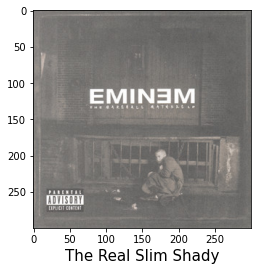

In [99]:
#import duas bibliotecas que me auxilia na visualização de imagens

import matplotlib.pyplot as plt
from skimage import io

# encontrando o Id e trazendo as informações da API
nome_musica = 'Eminem - The Real Slim Shady'
id= dados_gerais[dados_gerais['artists_song']==nome_musica]['id'].iloc[0]  # dentro da coluna aristis_song eu busco o Id da musica que eu quero no caso (Eminem - The Real Slim Shady)
track = sp.track(id)                                                       #sp é da biblioteca spotipy e track é o comando de busca do id
url = track['album']['images'][1]['url']                                   #seguindo ainda o comando track eu peço além do Id, a url e o nome da musica
name= track['name']          
image = io.imread(url)                                                     #chamo o skimage para que seja feito a leitura da url da imagem


#Plotando a imagem da capa da musica 

plt.imshow(image)
plt.xlabel(name, fontsize=15)
plt.show()

 # Buscando os dados da playlist

In [107]:
#nesse primeiro momento eu vou abrir uma funcao, essa funcao ira buscar os nomes, urls e id das minhas top 10 musicas
#nesse momento eu fiz um laço for, o cod está fazendo a mesma extracao da API com track mas aqui de uma forma mais rapida, após essa extração as informações vai ser incluidas nas variaveis URL E NAME que eu abri

def recommend_id(playlist_id):

  url =[]
  name=[]
  for i in playlist_id:
    track=sp.track(i)
    url.append(track['album']['images'][1]['url'])
    name.append(track['name'])

  return name, url

In [111]:
#chamo a funcao e incluo ela dentro de uma variavel

name, url = recommend_id(recomendada['id']) 
name, url

(['The Real Slim Shady',
  'Danza Kuduro',
  'Te Iré a Buscar',
  "Don't Threaten Me with a Good Time",
  '25 To Life',
  'Me Alegro de Su Odio 2014',
  'LoveGame',
  'Say Amen (Saturday Night)',
  "Pa' Que Retozen",
  'Ven Conmigo'],
 ['https://i.scdn.co/image/ab67616d00001e02dbb3dd82da45b7d7f31b1b42',
  'https://i.scdn.co/image/ab67616d00001e024640a26eb27649006be29a94',
  'https://i.scdn.co/image/ab67616d00001e026a5f4a693643417f48699dd5',
  'https://i.scdn.co/image/ab67616d00001e0223152d9337d6c57b116ed13a',
  'https://i.scdn.co/image/ab67616d00001e02c08d5fa5c0f1a834acef5100',
  'https://i.scdn.co/image/ab67616d00001e023a5efcce5b31f018800d7f01',
  'https://i.scdn.co/image/ab67616d00001e02631810af03785dbad83f5c81',
  'https://i.scdn.co/image/ab67616d00001e02c5148520a59be191eea16989',
  'https://i.scdn.co/image/ab67616d00001e0272b621a4c23f797307d35f11',
  'https://i.scdn.co/image/ab67616d00001e0229866617908a958f41917d76'])

 # Gerando as imagens da playlist e a parte estetistica do meu recomendador 

In [169]:
#vou aplicar nessa também uma funcao, porque é mais facil acrescentar ou mudar o cod depois 

#nessa primeira parte da funcao eu chamo um grafico onde a cada interacao da url a funcao possa plotar as imagens apartir das recomendacoes que eu fiz(como quantidade de coluna, tamanho das imagens...)
def visualize_songs(name, url):

    plt.figure(figsize=(15,10))
    columns = 5

    for i, u in enumerate(url): 
        # define o ax como o subplot, com a divisão que retorna inteiro do número urls pelas colunas + 1 (no caso, 6)
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)

        # Lendo a imagem com o Scikit Image
        image = io.imread(u)

        # Mostra a imagem
        plt.imshow(image)

        # Para deixar o eixo Y invisível 
        ax.get_yaxis().set_visible(False)

        # xticks define o local que vou trocar os rótulos do eixo x, nesse caso, deixar os pontos de marcação brancos
        plt.xticks(color = 'w', fontsize = 0.1)

        # yticks define o local que va trocar os rótulos do eixo y, nesse caso, deixar os pontos de marcação brancos
        plt.yticks(color = 'w', fontsize = 0.1)

        # Colocando o nome da música no eixo x
        plt.xlabel(name[i], fontsize = 8)

        # Faz com que todos os parâmetros se encaixem no tamanho da imagem definido
        plt.tight_layout(h_pad=0.7, w_pad=0)

        # Ajusta os parâmetros de layout da imagem.
        # wspace = A largura do preenchimento entre subparcelas, como uma fração da largura média dos eixos.
        # hspace = A altura do preenchimento entre subparcelas, como uma fração da altura média dos eixos.
        plt.subplots_adjust(wspace=None, hspace=None)

        # Remove os ticks - marcadores, do eixo x, sem remover o eixo todo, deixando o nome da música.
        plt.tick_params(bottom = False)

        # Tirar a grade da imagem, gerada automaticamente pelo matplotlib
        plt.grid(visible=None)
    plt.show()

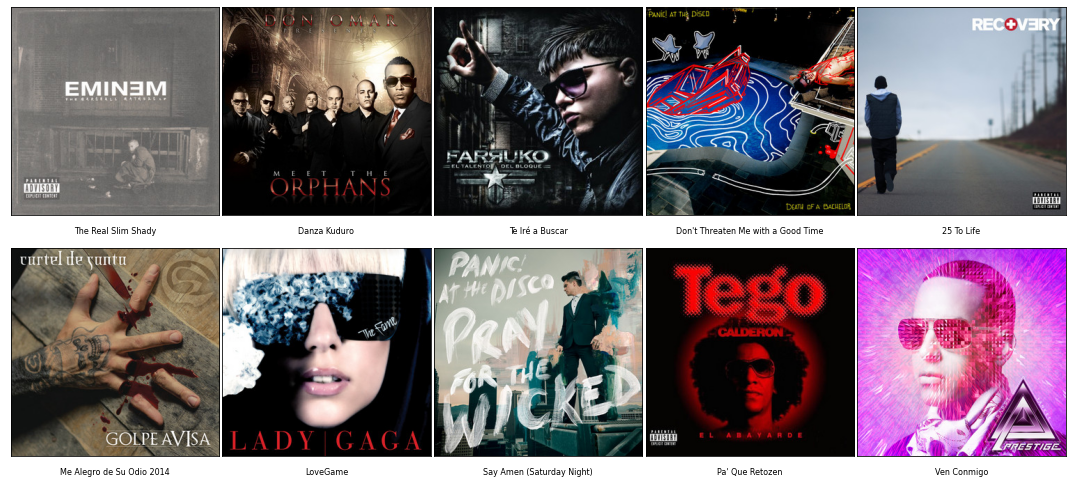

In [171]:
recomendador_finalizado = visualize_songs(name, url)
recomendador_finalizado